# **CIFAR dataset classification task using CNN**


I will try to create a model that will classify given image belongin 10 classes as given below 

The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

* Airplanes 0
* Cars 1
* Birds 2
* Cats 3
* Deer 4
* Dogs 5
* Frogs 6
* Horses 7
* Ships 8
* Trucks 9

(In python indexes start from zero)


The dataset consists of 60,000 32x32 color images and 6,000 images of each class

Images are 32x32

Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


In [2]:
# İmporting important libraries first 
!pip install tensorflow-gpu==2.0.0.alpha0
import numpy as np
import datetime
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0.alpha0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0.alpha0


# Chapter 1 
I will load the dataset from tensorflow. Tf.keras contains dataset for practice purposes. I can get directly.  

In [3]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data() # I can have dataset splitted as training and test 

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

As we can see from shape of train data we are dealing with colored images 32x32 with 3d. Each image is created by 3 layers as red green blue

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

and of course we have corresponding label for each image. 

In [7]:
y_test.shape

(10000, 1)

# Chapter 2
I will look at the dataset and show  

[3]


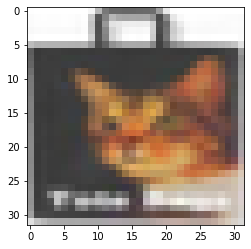

In [8]:
# For sample in training set at index 300 let's see 
i = 3000
plt.imshow(X_train[i])
print(y_train[i])

To see images with labels I am plotting them

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


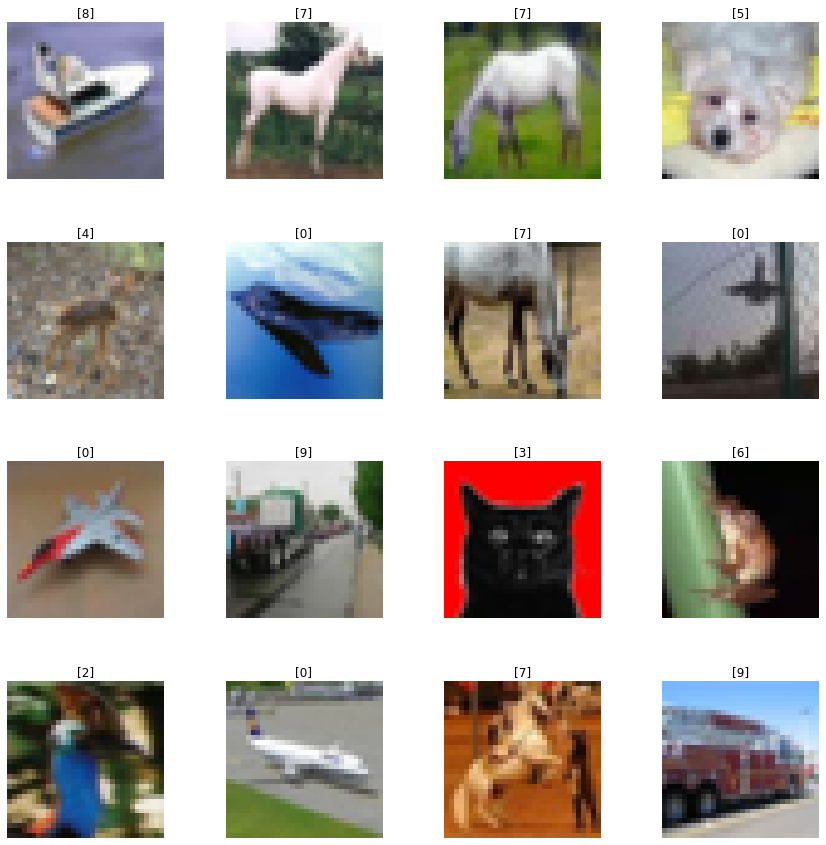

In [9]:
# I am choosing 4x4 frame / 16 images
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # picking a random number to show images 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) # setting title as label
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# Chapter 3 
Preperation of data 

this is how train data looks like 

In [10]:
X_train
type(X_train)

numpy.ndarray

In [11]:
# I am converting to float 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

we know that  there are 10 classes and we will covert them to categorical format by using one hot encoding. 

In [12]:
number_cat = 10
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)
print(y_train[:5])
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


I will also normalize training values by dividing each pixel values to 255 which is maximum bit value


In [13]:
X_train = X_train/255
X_test = X_test/255


In [14]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

Now I will chech and see input and output shapes 

In [15]:
Input_shape = X_train.shape[1:]
print(Input_shape)

(32, 32, 3)


In [16]:
y_train.shape

(50000, 10)

# Chapter 4 
Creating and training model
I am using general Convolutional Neural Network architecture with max pooling and 3x3 convolutional filters

Also adding dropuout for regularization 

Than I flatten and feed to fully connected MLP architecture with 1024 neurons with 2 layers

Finally I have 10 neurons output a neuron for each class with softmax to categorically return a probability 

In [17]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [18]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss ='categorical_crossentropy', metrics =['accuracy'])

In [19]:
epochs = 100

history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/100
98/98 [==============================] - 13s 33ms/step - loss: 2.1212 - accuracy: 0.2153
Epoch 2/100
98/98 [==============================] - 3s 31ms/step - loss: 1.9065 - accuracy: 0.3063
Epoch 3/100
98/98 [==============================] - 3s 31ms/step - loss: 1.7860 - accuracy: 0.3556
Epoch 4/100
98/98 [==============================] - 3s 31ms/step - loss: 1.6977 - accuracy: 0.3858
Epoch 5/100
98/98 [==============================] - 3s 31ms/step - loss: 1.6324 - accuracy: 0.4131
Epoch 6/100
98/98 [==============================] - 3s 31ms/step - loss: 1.5800 - accuracy: 0.4271
Epoch 7/100
98/98 [==============================] - 3s 31ms/step - loss: 1.5325 - accuracy: 0.4450
Epoch 8/100
98/98 [==============================] - 3s 31ms/step - loss: 1.4936 - accuracy: 0.4596
Epoch 9/100
98/98 [==============================] - 3s 31ms/step - loss: 1.4596 - accuracy: 0.4721
Epoch 10/100
98/98 [==============================] - 3s 31ms/step - loss: 1.4314 - accuracy: 0.481

# Chapter 5 
Evaluation of model 
on the last epoch we were able to reach 84% accuracy.

In [20]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))
# I am using evaluate method to use on test set 

313/313 [==============================] - 1s 4ms/step - loss: 0.7321 - accuracy: 0.7619
Test Accuracy: 0.761900007724762


In [26]:
predicted_classes = cnn.predict(X_test) 


313/313 [==============================] - 1s 3ms/step


In [34]:
print(predicted_classes[6]*100000)
np.argmax(predicted_classes[6])


[1.67391321e+02 4.74855870e+04 7.92065542e+02 1.49556100e+04
 2.72454618e+00 6.94697574e+03 1.47246930e+02 5.73739735e+02
 3.54247284e+01 2.88932413e+04]


1

In [35]:
# I wanted to be sure about using correct method of numpy 
dummy = np.array([3,1,98])
np.argmax(dummy)

2

Argmax returns the index of highest value in the array. Since we used softmax we need to get the highest probability for corresponding neuron which is positioned as representation of that class

In [40]:
predicted_classes_argmax = predicted_classes.argmax(1)


In [41]:
predicted_classes_argmax

array([3, 8, 8, ..., 5, 1, 7])

In [44]:
predicted_classes = predicted_classes_argmax
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

We'll do same thing for labels as well

In [42]:
y_test 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [43]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

Now we can demonstrate with actual labels and predictions to compare

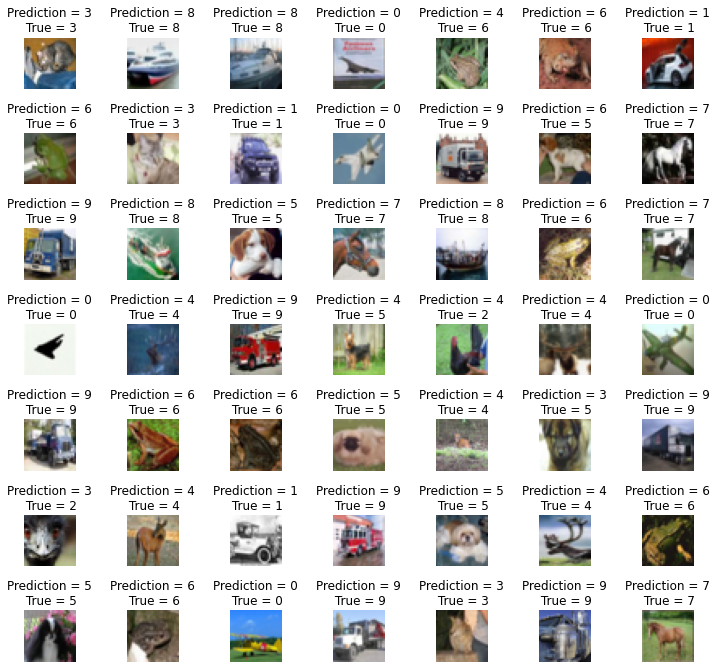

In [45]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

We can see that most of them are labeled as true. Model is not perfect but still looks exciting to such a task




Finally as usual we will use confusion matrix to see how predicted results and actual labels looks.
 

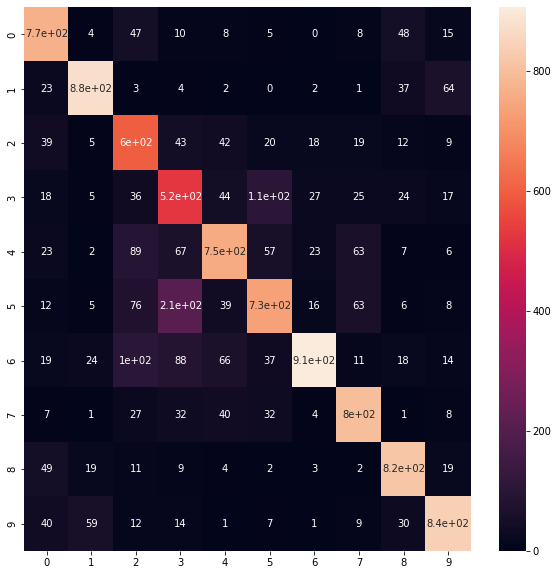

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test) # I have predicted on rows and y_test on columns
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

* When we look at row 3 and column 5 which means model predicted as class 3 (cat) and actual label was class 5 (dog). Model is having hard time for differentiate between cats and dogs. Since resolution is not high even for humans it is hard to tell if it is a dog or cat.

* When we look at 6th row (frog) and 2nd (birds) column again we are having trouble. I don't know why but somehow it creates a confusion ⛔


In [47]:
"""
I am leaving it here if you want to check yourself. It was hard for me to go up and down :D

Airplanes 0
Cars 1
Birds 2
Cats 3
Deer 4
Dogs 5
Frogs 6
Horses 7
Ships 8
Trucks 9
"""

'\nI am leaving it here if you want to check yourself. It was hard for me to go up and down :D\n\nAirplanes 0\nCars 1\nBirds 2\nCats 3\nDeer 4\nDogs 5\nFrogs 6\nHorses 7\nShips 8\nTrucks 9\n'